# Check if torch uses GPU

In [4]:
import torch
import torchvision
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name(0)

'GeForce GTX TITAN X'

# Train an MNIST 

In [26]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
#%%

In [27]:
no_cuda = False
seed = 13
batch_size = 64
test_batch_size = 64
log_interval = 1000
epochs =2
lr = 0.01
momentum = 0.5
save_model = True

In [82]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr= lr, momentum= momentum)

for epoch in range(1,  epochs + 1):
    train( model, device, train_loader, optimizer, epoch)
    test( model, device, test_loader)

if ( save_model):
    torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.323897

Test set: Average loss: 0.0999, Accuracy: 9700/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.034734

Test set: Average loss: 0.0605, Accuracy: 9818/10000 (98%)



#  Load model again 

In [92]:
model = Net()
model.load_state_dict(torch.load("mnist_cnn.pt"))
model.eval()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [100]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
model.forward(images).max(-1).shape

AttributeError: 'tuple' object has no attribute 'shape'

In [117]:
(model.forward(images).max(-1)[1] == labels).type(torch.float32).mean()

tensor(0.9531)

In [109]:
(model.forward(images).max(-1)[1] == labels).sum()

tensor(61)

In [108]:
labels.shape[0]

64

In [94]:
model.forward(images).to_numpy()

AttributeError: 'Tensor' object has no attribute 'to_numpy'

In [91]:
model.forward(images).numpy().argmax()

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [89]:
labels

tensor([6, 1, 6, 2, 2, 0, 8, 8, 4, 1, 5, 9, 1, 5, 9, 3, 1, 4, 4, 7, 2, 2, 2, 9,
        7, 8, 5, 2, 4, 7, 6, 1, 3, 6, 6, 4, 7, 6, 0, 6, 4, 7, 4, 3, 7, 9, 8, 8,
        8, 0, 6, 8, 4, 1, 9, 5, 5, 3, 2, 0, 5, 8, 3, 9])

# show images

In [36]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

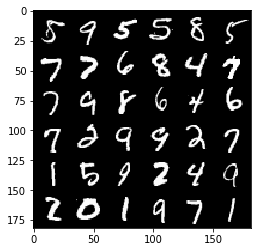

In [80]:
def imshow(img):
#     print(img.shape)
#     print(type(img))
    torchvision.utils.save_image(img, "test_img.png")

    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.imshow(npimg)
    plt.show()


# get some random training images
dataiter = iter(test_loader)
images, _ = dataiter.next()
images = images[:36]
# show images
imshow(torchvision.utils.make_grid(images,normalize =True, nrow=6))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [1]:
import optparse